In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('LumberJack BRUTAL AtidotCom XGBOOST\nLumberJack Jyss (c)')

LumberJack BRUTAL AtidotCom XGBOOST
LumberJack Jyss (c)


In [3]:
print('Importation des librairies...')
import statistics
import pickle
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from pandas.plotting import register_matplotlib_converters
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
print('Librairies importées')

Importation des librairies...
Librairies importées


In [4]:
df = pd.read_csv('dataset_ready_to_use.csv')

In [5]:
df = df.dropna()

In [6]:
df.set_index('Local time', inplace=True)
df = df.iloc[:,1:]
df.head()

,Open_audusd,High_audusd,Low_audusd,Close_audusd,Volume_audusd,Open_usdjpy,High_usdjpy,Low_usdjpy,Close_usdjpy,Volume_usdjpy,...,Volume_eurusd,Macdsignal_eurusd,rsi_eurusd,BBup_eurusd,BBmid_eurusd,BBlow_eurusd,atr_eurusd,wclprince_eurusd,short,long
Local time,,,,,,,,,,,,,,,,,,,,,
10.04.2004 02:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003009,37.355005,1.210666,1.209442,1.208217,0.001222,1.20888,0,1
10.04.2004 03:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003035,37.355005,1.210610,1.209471,1.208331,0.001134,1.20888,0,0
10.04.2004 04:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003060,37.355005,1.210553,1.209414,1.208275,0.001053,1.20888,0,0
10.04.2004 05:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003084,37.355005,1.210526,1.209373,1.208219,0.000978,1.20888,0,0
10.04.2004 06:00:00.000 GMT+0200,0.76255,0.76255,0.76255,0.76255,0.0,106.39,106.39,106.39,106.39,0.0,...,0.0,-0.003107,37.355005,1.210429,1.209311,1.208192,0.000908,1.20888,0,0


In [7]:
delta = df.shape[0]
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta,'périodes')
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' périodes \nBloc 2 :',bloc2,' périodes')

Période d'étude :  131566 périodes
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  105253  périodes 
Bloc 2 : 26313  périodes


In [8]:
df['long'].sum(),df['short'].sum()

(941, 937)

In [9]:
Xtrain_long = df.iloc[:bloc1,:-1]
Xtrain_long = Xtrain_long.drop(['short'],axis=1)
Xtest_long = df.iloc[bloc1:,:-1]
Xtest_long = Xtest_long.drop(['short'],axis=1)
ytrain_long = df.iloc[:bloc1,-1]
ytest_long = df.iloc[bloc1:,-1]

Xtrain_short = df.iloc[:bloc1,:-2]
Xtest_short = df.iloc[bloc1:,-2]
ytrain_short = df.iloc[:bloc1,:-2]
ytest_short = df.iloc[bloc1:,-2]
print('Split effectué')

Split effectué


In [10]:
ytrain_long.shape,Xtrain_long.shape,Xtest_long.shape,ytest_long.shape

((105253,), (105253, 42), (26313, 42), (26313,))

In [ ]:
model_long = XGBClassifier(silent=False,objective='binary:logistic',n_estimators=200)
eval_set_long=[(Xtrain_long, ytrain_long), (Xtest_long, ytest_long)]
model_long.fit(Xtrain_long, ytrain_long, eval_metric=['auc','error','logloss'], eval_set=eval_set_long, verbose=1)

In [ ]:
predictions_long.sum(),ytest_long.sum()

In [ ]:
predictions_long = model_long.predict(Xtest_long)
accuracy_long = accuracy_score(ytest_long, predictions_long)
precision_long=precision_score(ytest_long, predictions_long) # vrais_positifs/(vrais_positifs+faux_positifs)
# La précision permet de mesurer la capacité du modèle à refuser résultats non-pertinents.
recall_long=recall_score(ytest_long, predictions_long) # (vrai_positifs/(vrais_positifs+faux_négatifs))
roc_long=roc_auc_score(ytest_long,predictions_long)
print('Accuracy: %.2f%%' % (accuracy_long * 100.0))
print("Precision: %.2f%% " % (precision_long *100))
print("Recall: %.2f%% " % (recall_long * 100))
print("AUC: %.2f%% " % (roc_long *100))
# get probabilities for positive class
prediction_long = model_long.predict_proba(Xtest_long)
roc_long2 = roc_auc_score(ytest_long, prediction_long[:,1])
print("AUC_proba: %.2f%% " % (roc_long2 * 100))
print(classification_report(ytest_long, predictions_long))
print(confusion_matrix(ytest_long, predictions_long))

In [ ]:
type(predictions_long),len(predictions_long), predictions_long.sum(),predictions_long

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(predictions_long,)

In [ ]:
backtest = pd.DataFrame()
backtest['Close_eurusd'] = df['Close_eurusd']
backtest['long'] = df['long']
backtest['short'] = df['short']
backtest.head()

In [ ]:
backtest = backtest.iloc[bloc1:,:]
backtest.head()

In [ ]:
backtest['long'].sum(),backtest['short'].sum()

In [ ]:
len(prediction),prediction.sum()

In [ ]:
trend_label = []
trend_label4 = []
var_list = [0]
target = 0.001
stop_loss = 0.015
equity_list = [0]
equity = 100000
col_open_pos = [0]
col_close_pos = [0]
col_is_win = [0]
col_profit = [0]
col_cours = [0]
max_gain = (0,0)
max_loss = (0,0)
pos = 0
a = 0
nb_transactions = 0
trend = base_
for i in range(0,backtest.shape[0]):
    candle_close = float(base_test.iloc[i,33])
    candle_open = float(base_test.iloc[i,30])
    candle_high = float(base_test.iloc[i,31])
    candle_low = float(base_test.iloc[i,32])
    trend = backtest.iloc[i,1]
    
    
    if a == 0:
        pos = 0
    else:
        pos = 1
    
    if trend == 1 and pos == 0:
        a = 1
        nb_transactions+=1
        equity = equity - 1.5
        price_buy = candle_open
        var = candle_close-price_buy
        col_open_pos.append(1)
        equity_list.append(equity)
        var_list.append(0)
        col_cours.append(price_buy)
        col_profit.append(0)
        print('\033[94m \n',backtest.index[i])
        print("\033[94m Ouverture de position de $100,000")
        print("\033[94m Prix d'achat =$",price_buy)
        
        
    
    elif trend == 1 and pos == 1:
        var_list.append(0)
        equity_list.append(equity)
        col_profit.append(0)
    
    elif trend == 0 and pos == 1:
        var = candle_close-price_buy

        if var > target :
            price_sell = candle_close
            a = 0
            nb_transactions+=1
            col_close_pos.append(1)
            equity = equity - 1.5 + (price_sell-price_buy)*100000
            
            if (price_sell-price_buy)*100000 > max_gain[1]:
                max_gain = (i,(price_sell-price_buy)*100000)
                
            elif (price_sell-price_buy)*100000 < max_loss[1]:
                max_loss = (i,(price_sell-price_buy)*100000)
                
            equity_list.append(equity)
            var_list.append(var)
            col_cours.append(price_sell)
            print('\n\033[92m \n',backtest.index[i+1])
            print("\033[92m Cloture de position")
            print("\033[92m Prix de cloture = $",price_sell)
            print('pnl : ',(price_sell-price_buy)*100000)
            col_is_win.append(1)
            col_profit.append((price_sell-price_buy)*100000)
            
            
        elif var < stop_loss :
            price_sell = candle_close
            a = 0
            nb_transactions+=1
            col_close_pos.append(1)
            equity = equity - 1.5 + (price_sell-price_buy)*100000
            
            if (price_sell-price_buy)*100000 > max_gain[1]:
                max_gain = (i,(price_sell-price_buy)*100000)
                
            elif (price_sell-price_buy)*100000 < max_loss[1]:
                max_loss = (i,(price_sell-price_buy)*100000)
                
                equity_list.append(equity)
                var_list.append(var)
                col_cours.append(price_sell)
                print('\n\033[92m \n',backtest.index[i+1])
                print("\033[92m Cloture de position")
                print("\033[92m Prix de cloture = $",price_sell)
                print('pnl : ',(price_sell-price_buy)*100000)
                col_profit.append((price_sell-price_buy)*100000)
                col_is_win.append(0)
        
        elif var < target and var > stop_loss:
            var_list.append(0)
            equity_list.append(equity)
            col_profit.append(0)
            
    elif trend == 0 and pos == 0:
        var_list.append(0)
        equity_list.append(equity)
        col_profit.append(0)
        
        
        
        
        
        
var_dtf = pd.DataFrame()
var_dtf['Variations'] = var_list
var_dtf['Equity'] = equity_list
print("\n\033[95m \033[1m Les gains faramineux s'élèvent à : $",equity-100000,'!. En ',nb_transactions,' transactions.' )

In [ ]:
len(equity_list),len(var_list),len(col_profit),backtest['trend'].sum(),nb_transactions,equity-100000

In [ ]:
gain_sum = 0
loss_sum = 0
for i in range(len(col_profit)):
    if col_profit[i]>0:
        gain_sum+=col_profit[i]
    else :
        loss_sum+=col_profit[i]
        

In [ ]:
backtest_graph = pd.DataFrame()
backtest_graph['equity'] = equity_list
backtest_graph['col_profit'] = col_profit
#backtest_graph['col_is_win'] = col_is_win
#backtest_graph['col_cours'] = col_cours

In [ ]:
plt.figure(figsize=(16,6))
backtest_graph['equity'].plot(ylim=95000)
plt.legend()

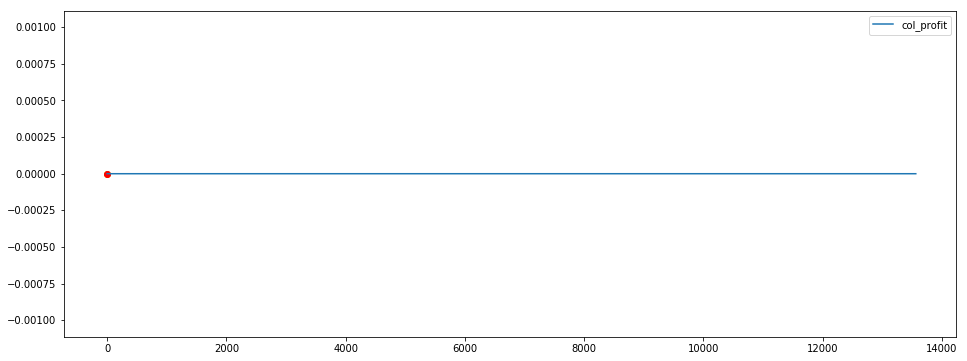

In [99]:
plt.figure(figsize=(16,6))
plt.plot(backtest_graph['col_profit'])
plt.scatter(max_gain[0],max_gain[1],c='y')
plt.scatter(max_loss[0],max_loss[1],c='r')
plt.legend()

In [100]:
print('Score Train : ',score_train,'%')
print('Score Test : ',score_test,'%')
print('Transaction à $100,000')
print('Gain généré',round(equity-100000,2))
print('Nombre de transactions : ',nb_transactions)
print('Fees : ',nb_transactions*1.5)
print('Nombre de positions gagnées',sum(col_is_win))
print('Nombre de positions perdues',sum(col_close_pos)-sum(col_is_win))
print('Gain maximal',round(max(col_profit),2),' ',round(max_gain[1],2))
print('Perte maximale',round(min(col_profit),2),' ',round(max_loss[1],2))
print('Moyenne du gain',statistics.mean(col_profit))
print('Somme de tous les gains',round(gain_sum,2))
print('Somme de tous le loss',round(abs(loss_sum),2))
print('profit factor',round(abs(gain_sum/loss_sum),2))


Score Train :  95.38 %
Score Test :  100.0 %
Transaction à $100,000
Gain généré 0
Nombre de transactions :  0
Fees :  0.0
Nombre de positions gagnées 0
Nombre de positions perdues 0
Gain maximal 0   0
Perte maximale 0   0
Moyenne du gain 0
Somme de tous les gains 0
Somme de tous le loss 0


ZeroDivisionError: division by zero

In [34]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(boost, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)